# ADS Homework #1
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 1, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - Probability (30 points)

Let's look at some basic probability simulations and how Python can be used as a tool to generate and evaluate probabilistic events.

**1.1)** Use the *numpy* or *random* library to generate a pair of six-sided dice. Simulate 100,000 roles of the dice, adding the two numbers together. Plot a histogram of the counts for each sum recorded. Caption the figure with any observations you may have (be sure to include a title); if you are unsure, make an educated gauss... er, I mean guess. (10 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
%matplotlib inline

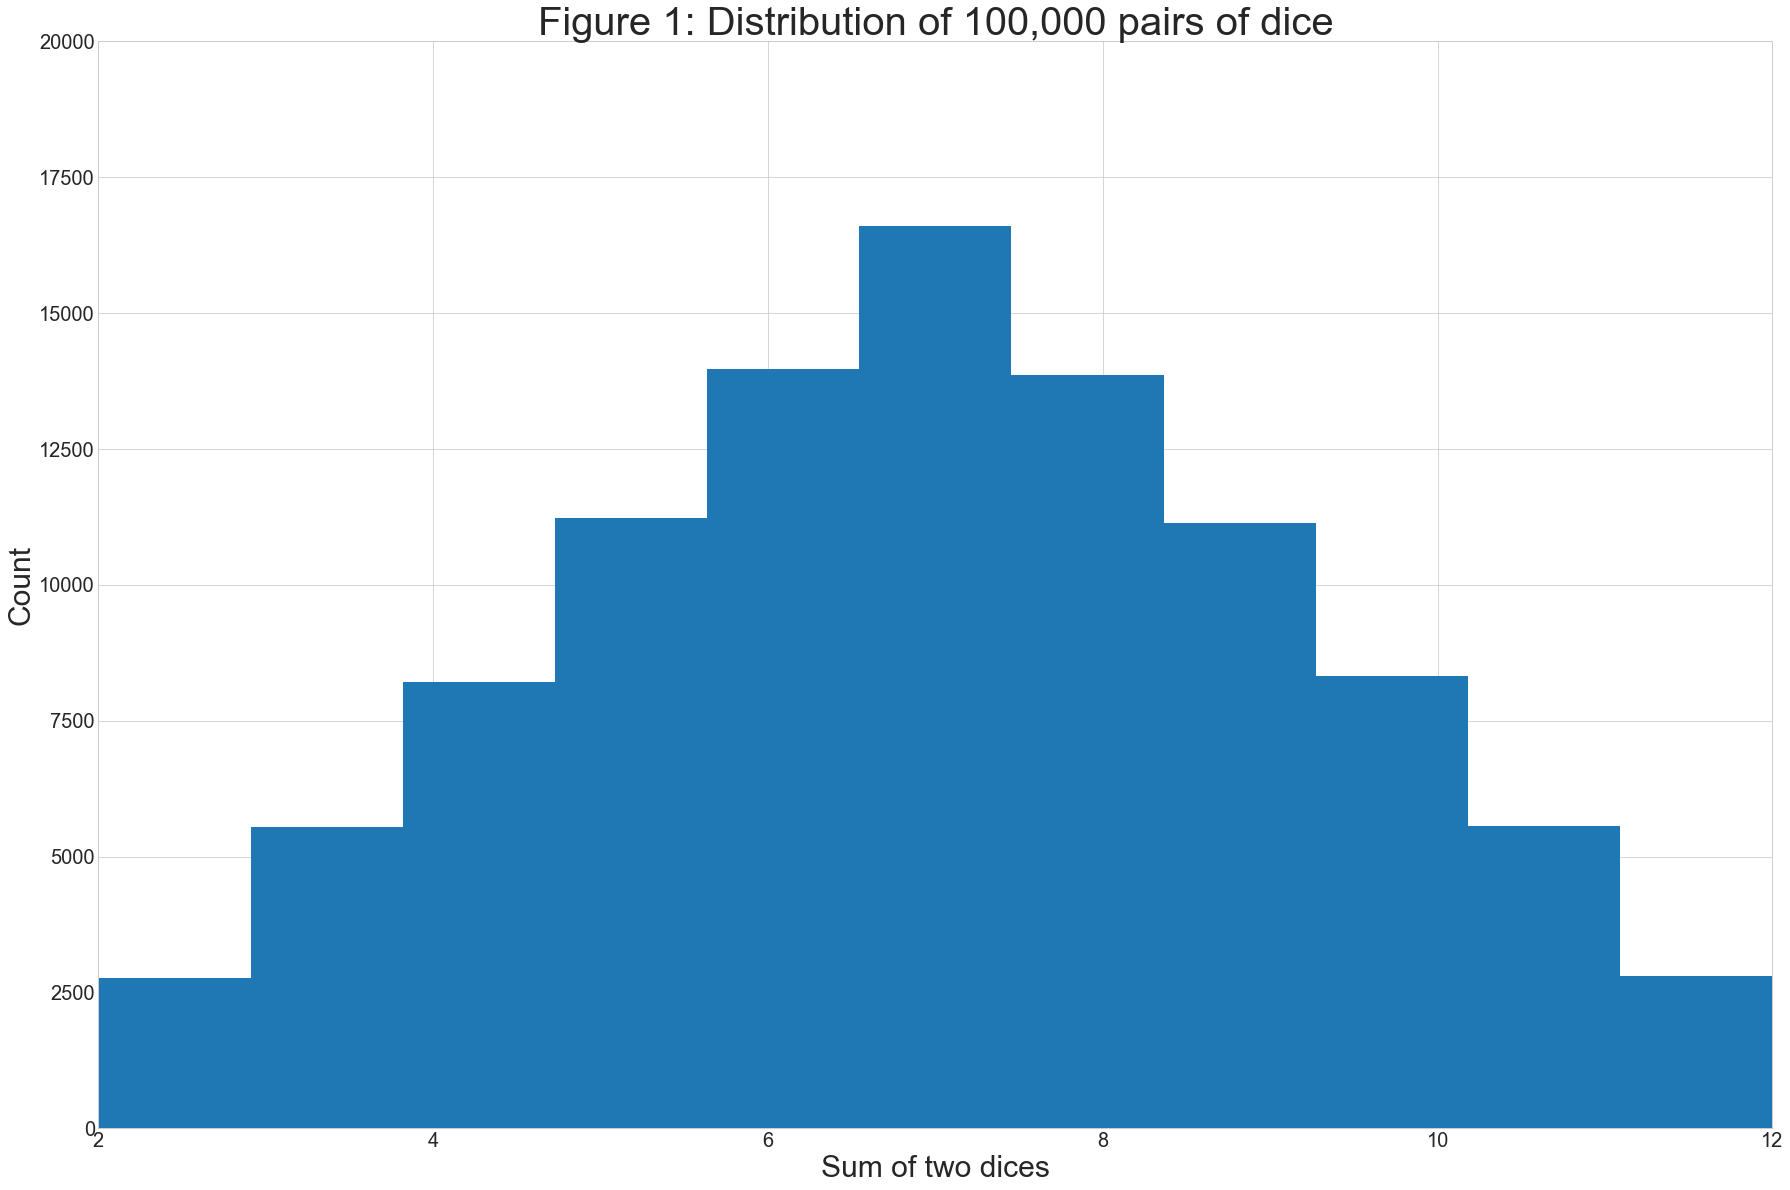

In [2]:
add_value = []
np.random.seed(42)
dice = np.random.randint(1,7,size = (100000,2))
sns.set_style("whitegrid")
for record in dice:
    add_value.append(sum(record))
plt.figure(figsize=(30,20))
plt.hist(add_value,bins=11)
plt.xlabel('Sum of two dices',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([2, 12, 0, 20000])
plt.title('Figure 1: Distribution of 100,000 pairs of dice',fontsize=40)
plt.show()

## Figure 1
Figure 1 shows a simulated result of dicing two 6-sides dices for 100,000 times, and add of number on each dice.

**1.2)** Using *x* and *y* provided below, plot the data and answer the following questions. (20 points total)

In [4]:
x = range(20)
y = [14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
     55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

(a) Calculate corr(x,y) and provide a brief description of what this tells us. (5 points)

In [5]:
np.corrcoef(x,y)

array([[1.        , 0.95630101],
       [0.95630101, 1.        ]])

## According to the correlation coefficients matrix, list _x_ and list _y_ are highly related to each other, 0.956  indicates a great positive linear relationship

(b) Generate a scatter plot of the data. Be sure to include a title and caption. (5 points)

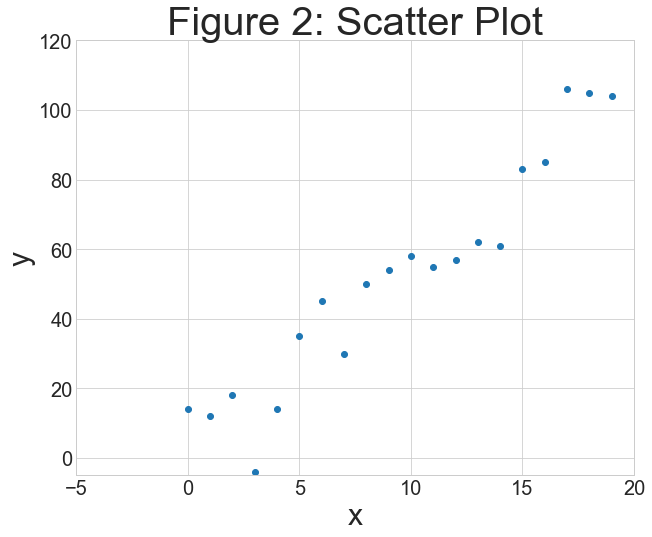

In [6]:
plt.figure(figsize=(10,8))
#plt.MarkerSize(3)
plt.scatter(x,y)
plt.xlabel('x',fontsize=30)
plt.ylabel('y',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([-5, 20, -5, 120])
plt.title('Figure 2: Scatter Plot',fontsize=40)
plt.show()

### Figure 2 is the scatter plot of provided data set.

(c) There's obviously some linear correlation going on here... using the *statsmodels* or *sklearn* libraries, fit a line to the data and plot this on the scatter plot generated in *b*. In the caption, be sure to discuss the R-squared value for the fit. (10 points)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sun, 30 Sep 2018   Prob (F-statistic):           4.71e-11
Time:                        14:35:06   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.6

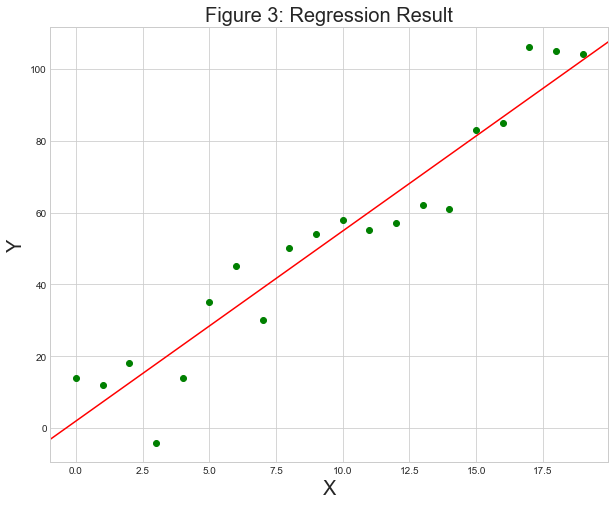

In [6]:
x = list(range(20))
X = np.array(x)
Y = np.array(y)
data_x = pd.DataFrame(X)
data_y = pd.DataFrame(Y)
data = pd.merge(data_x, data_y, left_index=True, right_index=True)
mod = smf.ols(formula='Y ~ X', data = data).fit()
figure, ax = plt.subplots(figsize=(10,8))
ax.scatter(X, Y, c='g')
abline_plot(model_results=mod, ax=ax, color='red')
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Figure 3: Regression Result', fontsize = 20)
print(mod.summary())

### Figure 3: The scatter and fit line of data set. In the regression table, according to the coef and t-value, we are able to reject H<sub>0</sub>. The R<sup>2</sup>=0.915, which means that is the 91.5% of the variance in the dependent variable that is predictable from the independent variable. This model explains the sample pretty good.

### Problem 2 (35 Points)

You are staring out the window from the 13th story of CUSP, looking on as people bustle about Jay Street; some head to the subway, others wait in line for street food, and yet others seem to wander around aimlessly. You don't know or care about what they are doing or where they are going. The one thing that you do know for certain is that none of them were born on a leap-day (February 29th). You also have recently found a dataset on subway ridership in NYC in which people have self-reported their birthdays. 

Because you are a data scientist, you begin to wonder... 'What is the likelihood that any one of them shares my birthday?' Knowing that, due to a variety of reasons, real-life births are not evenly distributed throughout the year, you decide to dig into the dataset to see if you can uncover trends in what time of year people are born. The dataset, unfortunately is a little messy, due to a poor user-interface, but with a bit of cleaning, should be fine to use. Let's take a closer look at the 'births.csv' dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

birthdays = pd.read_csv('birthdays.csv') # make sure file is in same folder as notebook
birthdays.index = birthdays.index + 1   
birthdays.index.name = 'day_of_year'

birthdays.head(5)

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034


* **'day_of_year'** describes the day of the year from January 1. <br>
* **'births'** describes the number of births that users registered for a given date <br>
* **'subway_ridership'** describes the average reported subway ridership (rides/month) for people born on that day.

2.1) First plot the birthday data (ignore subway ridership for now) and see if there are any patterns. If so, what are they? Include a description below your plot describing your observations and possible explainations - these observations can just be hypotheses, and do not have to be correct. (10 points)

Text(0.5,1,'Scatter Plot')

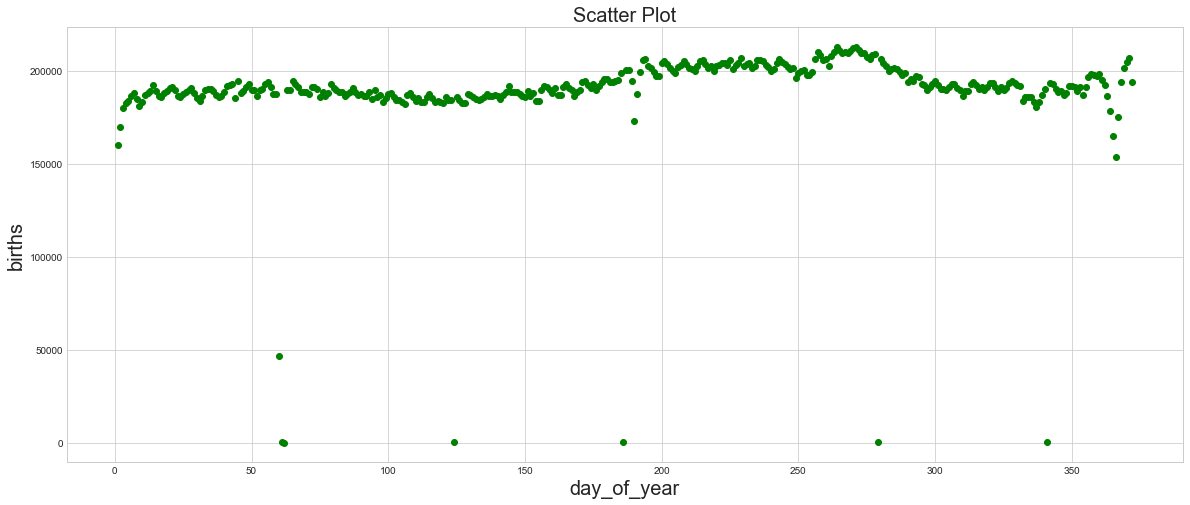

In [8]:
birthdays_births=birthdays['births']
day_of_year=birthdays.index
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(day_of_year, birthdays_births, c='g')
plt.xlabel('day_of_year', fontsize = 20)
plt.ylabel('births', fontsize = 20)
plt.title('Scatter Plot', fontsize = 20)

### Even there is a flactuation in the amount of births, it still has a raw range, except several outliers. Some points have a especially low value for births, I doubt their accuracy. In this plot, it seems that people are less likely to be born at the beginning and ending of the year, and more likely to be born at the middle of the year.

2.2) You should notice an issue in the data that you have plotted. Taking a glance at the raw datapoints should provide the answer. Please make note of what the issue is, and print the first 65 rows of a cleaned-up dataset. (15 points)

In [9]:
a = birthdays[(birthdays['month'] == 4) | (birthdays['month'] == 6) | (birthdays['month'] == 9) | (birthdays['month'] == 11)]
b = a[(birthdays['day'] == 31)]
c = birthdays[birthdays['month'] == 2]
d = c[(birthdays['day'] == 29) | (birthdays['day'] == 30) | (birthdays['day'] == 31)]
index_b = b.index
delete_index = index_b.append(d.index)
index_list = delete_index.values.tolist()
new_birthdays = birthdays.drop(index_list)
new_birthdays.index = range(1,366) 
new_birthdays.index.name = 'day_of_year'
print(new_birthdays.head(65))

             month  day  births  subway_ridership
day_of_year                                      
1                1    1  160369         46.763549
2                1    2  169896         38.745642
3                1    3  180036         42.628351
4                1    4  182854         38.160858
5                1    5  184145          2.195034
6                1    6  186726         16.720587
7                1    7  188277          5.829813
8                1    8  185186         45.891352
9                1    9  181511         14.486921
10               1   10  183668         12.736874
11               1   11  187006         44.175946
12               1   12  188032         10.043896
13               1   13  189202         11.257846
14               1   14  192648          8.622998
15               1   15  189346         43.571007
16               1   16  186601         29.385172
17               1   17  186186         45.143298
18               1   18  188293         43.748476


/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### In original data, every month had 31 days, but the fact is Apr. Jun., Sep. and Nov. has only 30 days, and Feb. has only 28 days in common year. That caused those outliers.

3.3) Plot the data again, and use the 'sort_values' method to examine high and low points. Do you notice anything about overall trends in births by time of year? Do any specific dates stand out? (10 points)

Text(0.5,1,'Cleaned Data Scatter Plot')

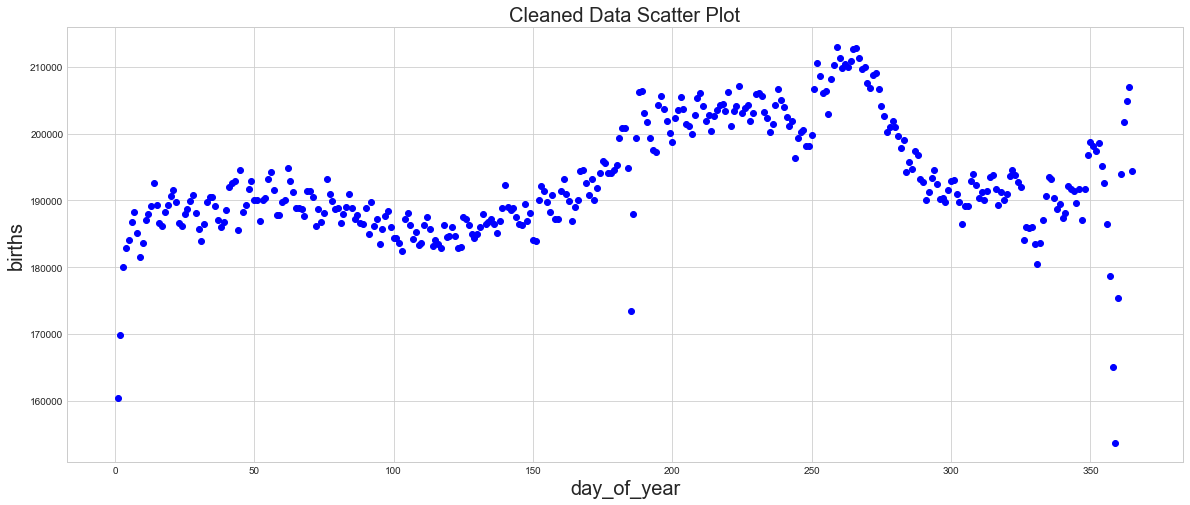

In [10]:
birthdays_births = new_birthdays['births']
day_of_year = new_birthdays.index
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(day_of_year, birthdays_births, c='b')
#plt.subplots.xlim = ([0, 300])
plt.xlabel('day_of_year', fontsize = 20)
plt.ylabel('births', fontsize = 20)
plt.title('Cleaned Data Scatter Plot', fontsize = 20)

### The first and last few days of the year seems have the lowest births, and there is also a day in the middle of the year has relatively low births.

     month  day  births  subway_ridership
1       12   25  153778         57.497671
2        1    1  160369         46.763549
3       12   24  165050        109.870765
4        1    2  169896         38.745642
5        7    4  173413         58.183340
6       12   26  175341        109.450518
7       12   23  178667         56.755423
8        1    3  180036         42.628351
9       11   27  180462         22.075020
10       1    9  181511         14.486921
11       4   13  182379         53.054358
12       5    3  182809         22.154826
13       1    4  182854         38.160858
14       4   27  182878         65.383223
15       5    4  183080         58.192743
16       4   24  183246         30.853163
17       4   19  183308         45.424007
18       4    5  183473         35.061440
19      11   26  183490        123.064727
20       4   26  183540         57.063551
21      11   28  183631         78.614277
22       4   12  183632         50.228885
23       4   20  183651         14

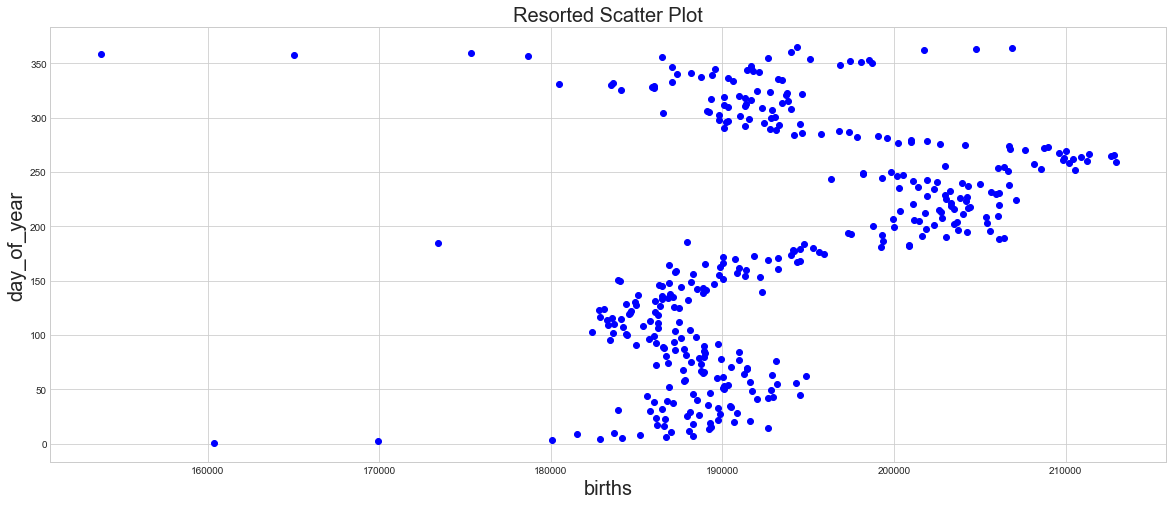

In [11]:
sort_births = new_birthdays.sort_values(by=['births'])
sort_births.index = range(1,366)
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(birthdays_births, sort_births.index, c='b')
plt.ylabel('day_of_year', fontsize = 20)
plt.xlabel('births', fontsize = 20)
plt.title('Resorted Scatter Plot', fontsize = 20)
print(sort_births)

### After sorted the cleaned data, the highest births' value most distributed in the begining and the end of the year, and the the lowest births' value most distributed in the September and August. Moreover, in the very begining and the very end of the year, amount of births seems significant  low.

### Problem 3 (35 Points)

Now that you've got clean data, you're curious... are people traveling on the subway more likely to have certain birthdays than others? A friend next to you makes the dubious claim that people born later in the year tend to ride the subway more often. You don't believe her, but want to use your data science skills to show that she's wrong (or to discover that you're wrong! Which is notably one of the most exciting experiences in the field of data science). You decide to test her claim armed with your newly-cleaned data and linear regression.

3.1) State the null hypothesis. (5 points)

### H<sub>0</sub>: People who are born in Oct. and later are less often or equally tend to ride the subway than others. _Significance level p = 0.05_.

3.2) Generate a scatter plot with subway ridership (the dependant variable) on the y-axis and birthday (as day of year) (the independant variable) on the x-axis. Fit a regression line to the data. (15 points)

Text(0.5,1,'birthday distribution - Subway Ridership')

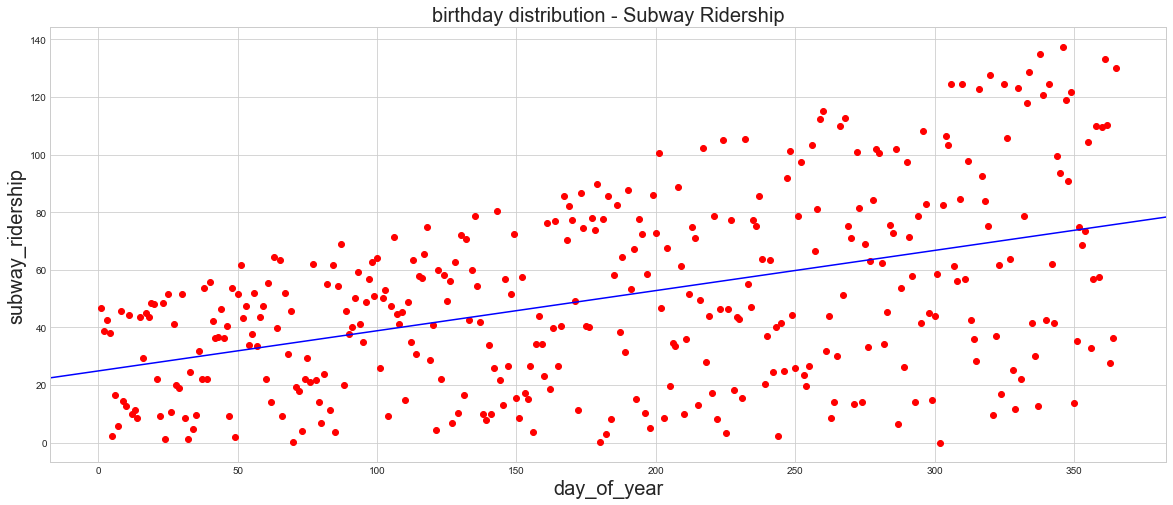

In [17]:
subway_ridership_data = new_birthdays['subway_ridership']
day_of_year = new_birthdays.index
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(day_of_year, subway_ridership_data, c='r')
mod = smf.ols(formula='subway_ridership ~ day_of_year', data = new_birthdays).fit()
abline_plot(model_results=mod, ax=ax, color='b')
plt.xlabel('day_of_year', fontsize = 20)
plt.ylabel('subway_ridership', fontsize = 20)
plt.title('birthday distribution - Subway Ridership', fontsize = 20)


3.3) Print the summary statistics of your regression and discuss if your results confirm or reject the null hypothesis at a p-value of 0.05. Discuss the possible implications of Type 1 & Type 2 errors and the choice of a 0.05 p-value. (15 points)

In [18]:
subway_ridership_data = new_birthdays['subway_ridership']
day_of_year = new_birthdays.index
mod = smf.ols(formula='subway_ridership_data ~ day_of_year', data = new_birthdays).fit()
print(mod.summary())

                              OLS Regression Results                             
Dep. Variable:     subway_ridership_data   R-squared:                       0.207
Model:                               OLS   Adj. R-squared:                  0.205
Method:                    Least Squares   F-statistic:                     94.76
Date:                   Sun, 30 Sep 2018   Prob (F-statistic):           4.74e-20
Time:                           14:37:53   Log-Likelihood:                -1743.9
No. Observations:                    365   AIC:                             3492.
Df Residuals:                        363   BIC:                             3500.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.92

### From my table, I have concluded that H<sub>0</sub> shoule be rejected.
#### Type 1 error: Rejecting H<sub>0</sub> when it is, in fact, true. In this case, it means that people who are born in Oct. and later are less or equal likely to take subway but we reject this assumption.
#### Type 2 error: Failing to reject H<sub>0</sub> when it is, in fact, false. In this case, it means that people who are born in Oct. and more likely to take subway but we didn't accept it.